In [143]:
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns

# K-means function
from sklearn.cluster import KMeans

# Functions for silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# Function to standardize the data 
from sklearn.preprocessing import scale

# Functions for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [144]:
#Data Presentation

In [145]:
# Load the data: temp
temp = pd.read_csv("temperat.csv",sep=";")
temp=temp.rename(columns={'Unnamed: 0': 'Ville'})
print(temp)

            Ville  Janvier  Fevrier  Mars  Avril   Mai  Juin  Juillet  Aout  \
0       Amsterdam      2.9      2.5   5.7    8.2  12.5  14.8     17.1  17.1   
1         Athenes      9.1      9.7  11.7   15.4  20.1  24.5     27.4  27.2   
2          Berlin     -0.2      0.1   4.4    8.2  13.8  16.0     18.3  18.0   
3       Bruxelles      3.3      3.3   6.7    8.9  12.8  15.6     17.8  17.8   
4        Budapest     -1.1      0.8   5.5   11.6  17.0  20.2     22.0  21.3   
5      Copenhague     -0.4     -0.4   1.3    5.8  11.1  15.4     17.1  16.6   
6          Dublin      4.8      5.0   5.9    7.8  10.4  13.3     15.0  14.6   
7        Helsinki     -5.8     -6.2  -2.7    3.1  10.2  14.0     17.2  14.9   
8            Kiev     -5.9     -5.0  -0.3    7.4  14.3  17.8     19.4  18.5   
9        Cracovie     -3.7     -2.0   1.9    7.9  13.2  16.9     18.4  17.6   
10       Lisbonne     10.5     11.3  12.8   14.5  16.7  19.4     21.5  21.9   
11        Londres      3.4      4.2   5.5    8.3  11

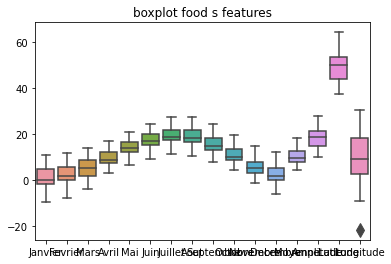

In [146]:
# Boxplot for food
plt.figure()
plt.title('boxplot food s features')
temp_box=sns.boxplot(data=temp,fliersize=10)   # fliersize is the size used to indicate the outliers
plt.show()

In [147]:
 #With this representation, we do not visually extract some clusters. We however remark that,  shows a lot of outliers.

In [148]:
temp.describe()

,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre,Moyenne,Amplitude,Latitude,Longitude
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1.345714,2.217143,5.228571,9.282857,13.911429,17.414286,19.622857,18.980000,15.631429,11.002857,6.065714,2.880000,10.265714,18.317143,49.051429,9.717143
std,5.502157,5.498956,4.863040,3.806456,3.273582,3.320271,3.574673,3.727939,4.109728,4.323226,4.566820,4.967411,3.963061,4.505649,7.096328,11.391521
min,-9.300000,-7.900000,-3.700000,2.900000,6.500000,9.300000,11.100000,10.600000,7.900000,4.500000,-1.100000,-6.000000,4.500000,10.200000,37.400000,-21.600000
25%,-1.550000,-0.150000,1.600000,7.250000,12.150000,15.400000,17.300000,16.650000,13.000000,8.650000,3.200000,0.250000,7.750000,14.900000,43.900000,2.800000
50%,0.200000,1.900000,5.400000,8.900000,13.800000,16.900000,18.900000,18.300000,14.800000,10.200000,5.100000,1.700000,9.700000,18.500000,50.000000,9.200000
75%,4.900000,5.800000,8.500000,12.050000,16.350000,19.800000,21.750000,21.600000,18.250000,13.300000,7.900000,5.400000,12.650000,21.450000,53.350000,18.150000
max,10.700000,11.800000,14.100000,16.900000,20.900000,24.500000,27.400000,27.200000,24.300000,19.400000,14.900000,12.000000,18.200000,27.600000,64.100000,30.300000


In [149]:
#We're gonna try to find clusters with lat/long and average temperature

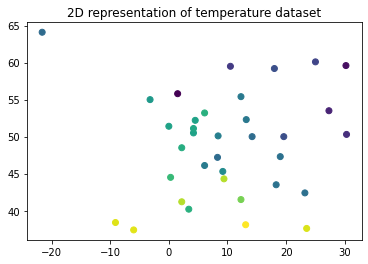

In [150]:
# Representation of the temperature dataset
plt.title('2D representation of temperature dataset')
plt.scatter(temp['Longitude'],temp['Latitude'], c=temp['Decembre'])

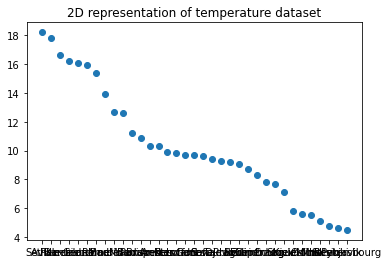

In [151]:
# Representation of the temperature dataset
plt.title('2D representation of temperature dataset')
plt.scatter(temp_sorted['Ville'],temp_sorted['Moyenne'])

In [152]:
#We can say that latitude and longitude are highly correlated 

In [153]:
#K-means sur Ville et Moyenne

temp_kmeans= temp[['Ville','Moyenne']]
temp_sorted=temp_kmeans.sort_values(by=['Moyenne'],ascending=False)

[[ 3.26666667  3.55555556  5.75555556  8.18888889 11.73333333 14.6
  16.65555556 16.35555556 13.84444444 10.34444444  6.25555556  4.27777778
   9.58888889 13.44444444 52.27777778 -0.36666667]
 [-6.27142857 -5.74285714 -1.78571429  4.71428571 11.34285714 15.6
  17.82857143 16.38571429 11.5         5.85714286  0.3        -3.7
   5.48571429 24.15714286 56.85714286 20.4       ]
 [ 8.8375      9.7625     11.875      14.5875     18.2625     21.975
  24.7375     24.4        21.875      17.5125     12.925       9.875
  16.2625     15.9625     39.8375      6.1       ]
 [-0.82727273  0.7         4.42727273  9.22727273 14.16363636 17.55454545
  19.47272727 18.83636364 15.18181818 10.08181818  4.59090909  0.83636364
   9.5        20.3        48.14545455 13.8       ]]


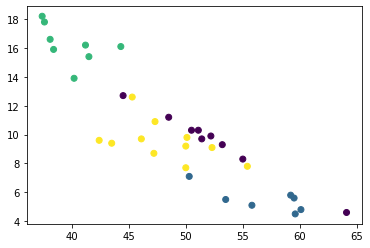

In [154]:
# We run a K-means algorithm onto the temp dataset, and display the centers

new_temp = temp.drop(['Ville'], axis=1)
new_temp = new_temp.drop(['Region'], axis=1)

kmeans = KMeans(n_clusters=4,n_init=10,init='random').fit(new_temp)
centers=kmeans.cluster_centers_
print(centers)

# We also represent the data in 2D-space with colors corresponding to cluster
kmeans.labels_
plt.scatter(new_temp['Latitude'], new_temp['Moyenne'],c=kmeans.labels_)

In [183]:
#This is the code to display a map, with whichever attribute we want

import folium
from folium.plugins import FastMarkerCluster
from folium.vector_layers import CircleMarker
import branca.colormap as cm

#We select the file we're going to use
file=temp
champ_etudie='Moyenne'

linear=cm.linear.RdYlBu_06.scale(0, 1)


m = folium.Map(tiles='cartodbpositron', zoom_start=3 ,location=[48.499998 ,23.3833318])

for index,row in file.iterrows():
#     keyon_cluster = folium.Marker(location=[row['Latitude'],row['Longitude']],popup=row['Ville']).add_to(m)
    folium.CircleMarker(location=[row['Latitude'],row['Longitude']], 
                        radius=5,
                        popup=str(row['Ville'])+': '+str(row[champ_etudie]), 
                        line_color=None,
                        fill_color=linear(1-(row[champ_etudie]-file[champ_etudie].min())/(file[champ_etudie].max()-file[champ_etudie].min())),
                        fill_opacity=1,
                        color=linear(1-(row[champ_etudie]-file[champ_etudie].min())/(file[champ_etudie].max()-file[champ_etudie].min()))).add_to(m)

In [184]:
m

In [175]:
linear

In [108]:
import folium
from folium.plugins import FastMarkerCluster
from folium.vector_layers import CircleMarker

m = folium.Map(tiles='cartodbpositron', zoom_start=4 ,location=[48.499998 ,23.3833318])

L=[]
for index,row in temp.iterrows():
    keyon_cluster = folium.Marker(location=[row['Latitude'],row['Longitude']],popup=row['Ville']).add_to(m)
#     folium.CircleMarker(location=[row['Latitude'],row['Longitude']], radius=1,
#                     popup=row['Ville'], line_color='#3186cc',
#                     fill_color='#3186cc').add_to(m)
m

,Ville,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre,Moyenne,Amplitude,Latitude,Longitude,Region
0,Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,Ouest
1,Athenes,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5,Sud
2,Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2,Ouest
3,Bruxelles,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2,Ouest
4,Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0,Est
5,Copenhague,-0.4,-0.4,1.3,5.8,11.1,15.4,17.1,16.6,13.3,8.8,4.1,1.3,7.8,17.5,55.4,12.3,Nord
6,Dublin,4.8,5.0,5.9,7.8,10.4,13.3,15.0,14.6,12.7,9.7,6.7,5.4,9.3,10.2,53.2,6.1,Nord
7,Helsinki,-5.8,-6.2,-2.7,3.1,10.2,14.0,17.2,14.9,9.7,5.2,0.1,-2.3,4.8,23.4,60.1,25.0,Nord
8,Kiev,-5.9,-5.0,-0.3,7.4,14.3,17.8,19.4,18.5,13.7,7.5,1.2,-3.6,7.1,25.3,50.3,30.3,Est
9,Cracovie,-3.7,-2.0,1.9,7.9,13.2,16.9,18.4,17.6,13.7,8.6,2.6,-1.7,7.7,22.1,50.0,19.6,Est
